## 1. Import Packages

In [108]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import tensorflow as tf
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.ndimage import zoom
## pydot and graphviz 

## 2. Import datasets

In [109]:
pneumonia_dataset = np.load('../Datasets/pneumoniamnist.npz')
print("Get object keys", pd.DataFrame(pneumonia_dataset).head())

Get object keys               0
0  train_images
1    val_images
2   test_images
3  train_labels
4    val_labels


## 3. Get images and labels

train_images dimensions (4708, 28, 28)
val_images dimensions (524, 28, 28)
test_images dimensions (624, 28, 28)
train_labels dimensions (4708, 1)
val_labels dimensions (524, 1)
test_labels dimensions (624, 1)
25.78589618206024
74.21410083770752
25.763359665870667
74.23664331436157
37.5
62.5


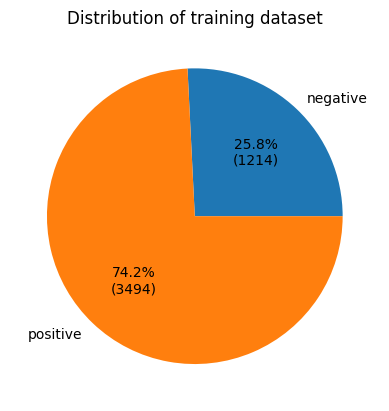

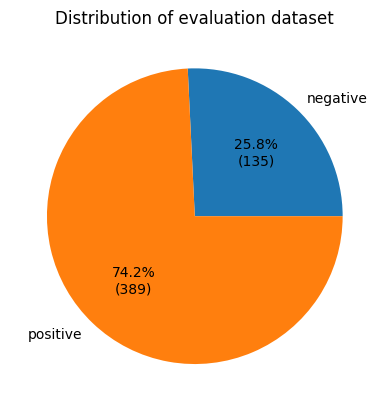

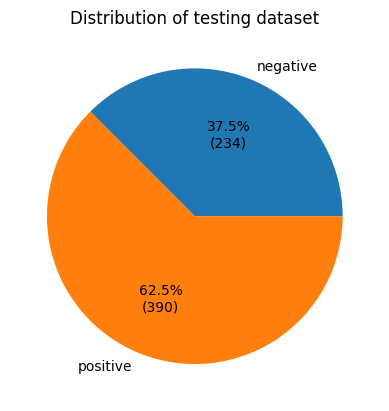

In [110]:
train_images = pneumonia_dataset['train_images']
print("train_images dimensions", np.shape(train_images))
val_images = pneumonia_dataset['val_images']
print("val_images dimensions", np.shape(val_images))
test_images = pneumonia_dataset['test_images']
print("test_images dimensions", np.shape(test_images))
train_labels = pneumonia_dataset['train_labels']
print("train_labels dimensions", np.shape(train_labels))
val_labels = pneumonia_dataset['val_labels']
print("val_labels dimensions", np.shape(val_labels))
test_labels = pneumonia_dataset['test_labels']
print("test_labels dimensions", np.shape(test_labels))

def getClassDistribution(label_array, title): 
  class_count = [0,0]
  for i in label_array:
      class_count[i[0]] += 1
  def my_fmt(x):
    print(x)
    return '{:.1f}%\n({:.0f})'.format(x, total*x/100)
  total =  class_count[0] + class_count[1]
  fig = plt.figure()
  plt.pie(class_count, labels=["negative","positive"], autopct=my_fmt)
  plt.title(title)


getClassDistribution(train_labels, "Distribution of training dataset")
getClassDistribution(val_labels, "Distribution of evaluation dataset")
getClassDistribution(test_labels, "Distribution of testing dataset")


## 4. Display a image from the dataset

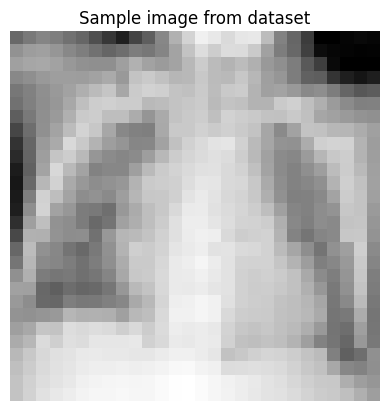

In [111]:
sample_image = train_images[0]
plt.imshow(sample_image, cmap="gray")
plt.axis("off")
plt.title("Sample image from dataset")
plt.show()

## 5. Convert image data from integers to floating point numbers

In [112]:
train_images = train_images / 255.0
print("New dataset format using floating point numbers", train_images)
val_images = val_images / 255.0

test_images = test_images / 255.0

New dataset format using floating point numbers [[[0.36078431 0.42352941 0.45882353 ... 0.01960784 0.03137255 0.02352941]
  [0.50588235 0.54117647 0.55294118 ... 0.01568627 0.00784314 0.01176471]
  [0.55294118 0.57254902 0.58039216 ... 0.         0.         0.        ]
  ...
  [0.65882353 0.70588235 0.75294118 ... 0.46666667 0.45098039 0.49411765]
  [0.67843137 0.72156863 0.76470588 ... 0.6        0.54509804 0.51764706]
  [0.67843137 0.7254902  0.77647059 ... 0.65882353 0.60392157 0.54509804]]

 [[0.45098039 0.4627451  0.45882353 ... 0.48235294 0.45098039 0.40784314]
  [0.50980392 0.5372549  0.54901961 ... 0.57254902 0.52941176 0.4745098 ]
  [0.5254902  0.59215686 0.65490196 ... 0.59607843 0.54117647 0.48235294]
  ...
  [0.69019608 0.70588235 0.73333333 ... 0.6627451  0.59215686 0.55686275]
  [0.70980392 0.7254902  0.75294118 ... 0.67843137 0.63921569 0.61960784]
  [0.72156863 0.74117647 0.76470588 ... 0.71764706 0.69019608 0.6627451 ]]

 [[0.58431373 0.57254902 0.57647059 ... 0.501960

## 6. Create a neural network (NN) model

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_12 (Flatten)        (None, 784)               0         
                                                                 
 dense_36 (Dense)            (None, 128)               100480    
                                                                 
 dropout_24 (Dropout)        (None, 128)               0         
                                                                 
 dense_37 (Dense)            (None, 32)                4128      
                                                                 
 dropout_25 (Dropout)        (None, 32)                0         
                                                                 
 dense_38 (Dense)            (None, 2)                 66        
                                                                 
Total params: 104674 (408.88 KB)
Trainable params: 10

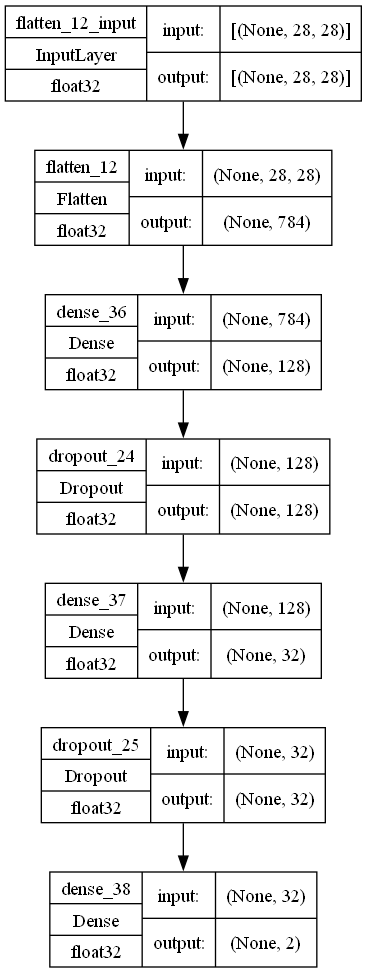

In [113]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])

NN_model.summary()

tf.keras.utils.plot_model(NN_model, to_file='NN_model.png', show_shapes=True, 
    show_dtype=True)

## 7. Compile NN model

In [114]:
NN_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(optimizer=NN_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## 8. Train NN Model

In [115]:
history = NN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=20)

Epoch 1/20
95/95 [==============================] - 1s 6ms/step - loss: 0.5291 - accuracy: 0.7417 - val_loss: 0.4213 - val_accuracy: 0.7901
Epoch 2/20
95/95 [==============================] - 0s 5ms/step - loss: 0.4109 - accuracy: 0.8205 - val_loss: 0.3473 - val_accuracy: 0.8282
Epoch 3/20
95/95 [==============================] - 0s 4ms/step - loss: 0.3432 - accuracy: 0.8664 - val_loss: 0.2709 - val_accuracy: 0.8912
Epoch 4/20
95/95 [==============================] - 0s 5ms/step - loss: 0.2966 - accuracy: 0.8919 - val_loss: 0.2388 - val_accuracy: 0.9103
Epoch 5/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2661 - accuracy: 0.9027 - val_loss: 0.2175 - val_accuracy: 0.9256
Epoch 6/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2462 - accuracy: 0.9078 - val_loss: 0.1961 - val_accuracy: 0.9389
Epoch 7/20
95/95 [==============================] - 0s 4ms/step - loss: 0.2332 - accuracy: 0.9131 - val_loss: 0.1929 - val_accuracy: 0.9332
Epoch 8/20
95/95 [==

## 9. Plot NN training and evaluation results

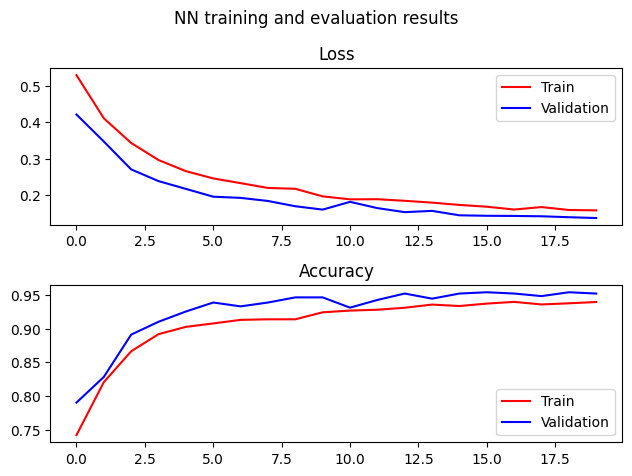

In [116]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(history.history['loss'], 'r')
line2, = axis[0].plot(history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(history.history['accuracy'], 'r')
line4, = axis[1].plot(history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("NN training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 10. Run NN model with test data and plot confusion matrix

20/20 [==============================] - 0s 2ms/step
Accuracy: 83.33333333333333


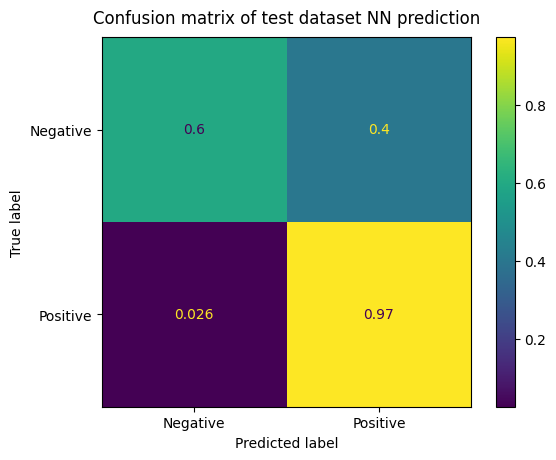

In [117]:
NN_test_prediction = NN_model.predict(test_images)

NN_test_prediction = np.argmax(NN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(NN_test_prediction)):
  if NN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, NN_test_prediction , normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of test dataset NN prediction", pad=10)
plt.show()

## 11. Save NN model

In [118]:
#NN_model.save("NN_model")

## 12. Find improperly classified images

In [119]:
def getClassifiedImageIndecies (predictions, labels):
  true_negative = []
  true_positive = []
  false_positive = []
  false_negative = []

  for i in range(len(labels)):
    if predictions[i] == labels[i]:
      if labels[i] == 0:
        true_negative.append(i)
      else:
        true_positive.append(i)
    else:
      if labels[i] == 0:
        false_positive.append(i)
      else:
        false_negative.append(i)

  return true_negative, true_positive, false_positive, false_negative

NN_true_negative, NN_true_positive, NN_false_positive, NN_false_negative = getClassifiedImageIndecies(NN_test_prediction, test_labels)


## 13. Display incorrectly and correctly classified images

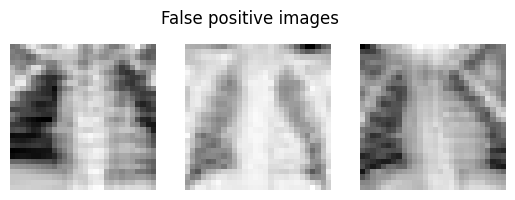

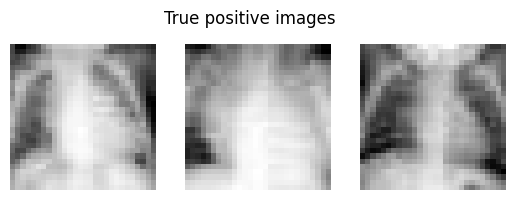

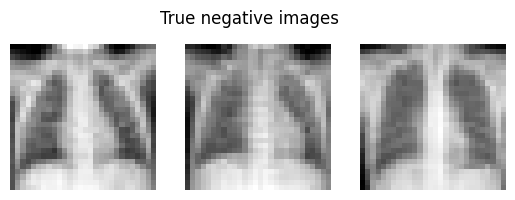

In [120]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_false_positive[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_false_positive[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_false_positive[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('False positive images')
fig.subplots_adjust(top=1.4)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_true_positive[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_true_positive[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_true_positive[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('True positive images')
fig.subplots_adjust(top=1.4)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.imshow(test_images[NN_true_negative[0]], cmap="gray")
ax1.axis("off")
ax2.imshow(test_images[NN_true_negative[10]], cmap="gray")
ax2.axis("off")
ax3.imshow(test_images[NN_true_negative[-1]], cmap="gray")
ax3.axis("off")
fig.suptitle('True negative images')
fig.subplots_adjust(top=1.4)



## 14. Create a convolutional neural network (CNN) model

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_12 (Conv2D)          (None, 24, 24, 32)        832       
                                                                 
 max_pooling2d_12 (MaxPooli  (None, 22, 22, 32)        0         
 ng2D)                                                           
                                                                 
 conv2d_13 (Conv2D)          (None, 18, 18, 32)        25632     
                                                                 
 max_pooling2d_13 (MaxPooli  (None, 16, 16, 32)        0         
 ng2D)                                                           
                                                                 
 flatten_13 (Flatten)        (None, 8192)              0         
                                                                 
 dense_39 (Dense)            (None, 128)             

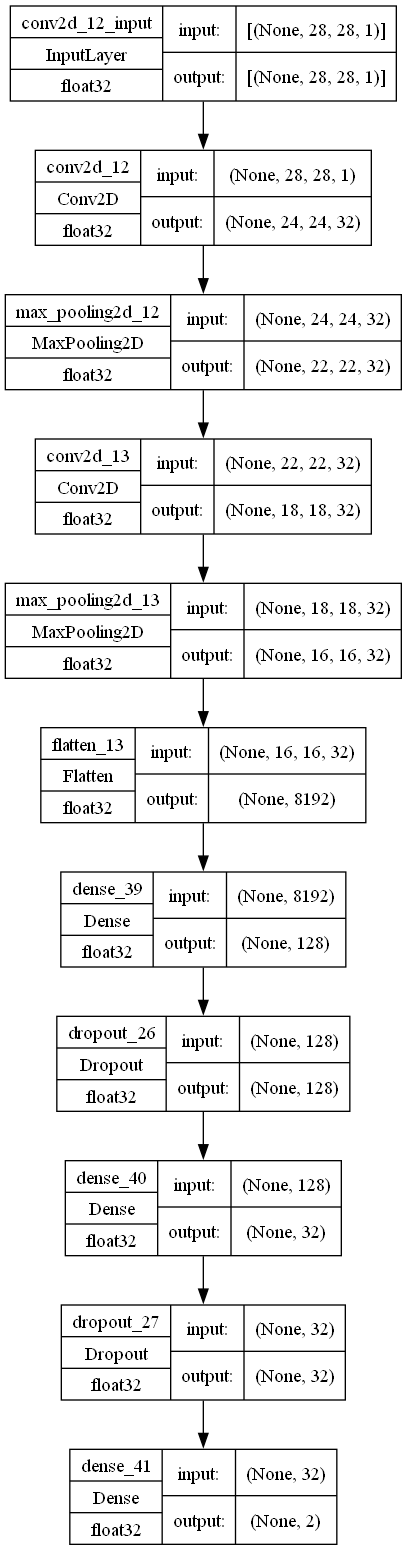

In [121]:
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size =(5, 5), strides =1, activation ='relu', input_shape = (28,28,1)), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Conv2D(32, kernel_size =(5, 5), strides =1, activation ='relu'), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])


CNN_model.summary()

tf.keras.utils.plot_model(CNN_model, to_file='CNN_model.png', show_shapes=True, 
    show_dtype=True)

## 15. Complie CNN model

In [122]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

## 16. Train CNN model

In [123]:
CNN_history = CNN_model.fit(train_images, train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=30)

Epoch 1/30
95/95 [==============================] - 3s 24ms/step - loss: 0.4647 - accuracy: 0.7768 - val_loss: 0.3707 - val_accuracy: 0.8168
Epoch 2/30
95/95 [==============================] - 2s 24ms/step - loss: 0.3016 - accuracy: 0.8842 - val_loss: 0.2477 - val_accuracy: 0.9084
Epoch 3/30
95/95 [==============================] - 2s 25ms/step - loss: 0.2476 - accuracy: 0.9055 - val_loss: 0.2049 - val_accuracy: 0.9275
Epoch 4/30
95/95 [==============================] - 2s 25ms/step - loss: 0.2463 - accuracy: 0.9019 - val_loss: 0.1871 - val_accuracy: 0.9313
Epoch 5/30
95/95 [==============================] - 3s 29ms/step - loss: 0.2098 - accuracy: 0.9210 - val_loss: 0.1922 - val_accuracy: 0.9237
Epoch 6/30
95/95 [==============================] - 2s 25ms/step - loss: 0.1909 - accuracy: 0.9265 - val_loss: 0.1474 - val_accuracy: 0.9523
Epoch 7/30
95/95 [==============================] - 2s 25ms/step - loss: 0.1795 - accuracy: 0.9312 - val_loss: 0.1403 - val_accuracy: 0.9523
Epoch 8/30
95

## 17. Plot CNN training and evaluation results

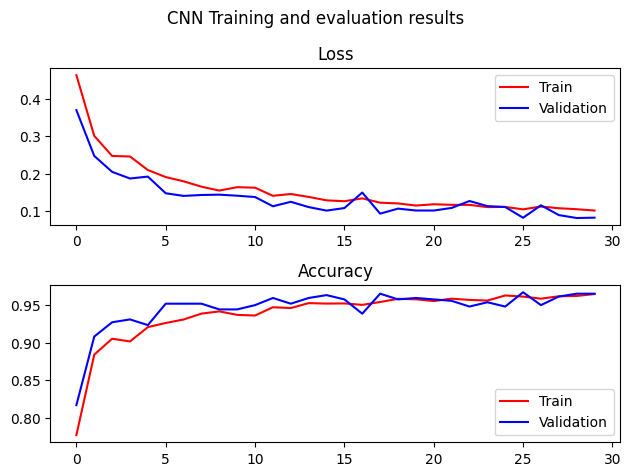

In [124]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(CNN_history.history['loss'], 'r')
line2, = axis[0].plot(CNN_history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(CNN_history.history['accuracy'], 'r')
line4, = axis[1].plot(CNN_history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("CNN Training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 18. Run CNN model with test data and plot confusion matrix

20/20 [==============================] - 0s 5ms/step
Accuracy: 84.4551282051282


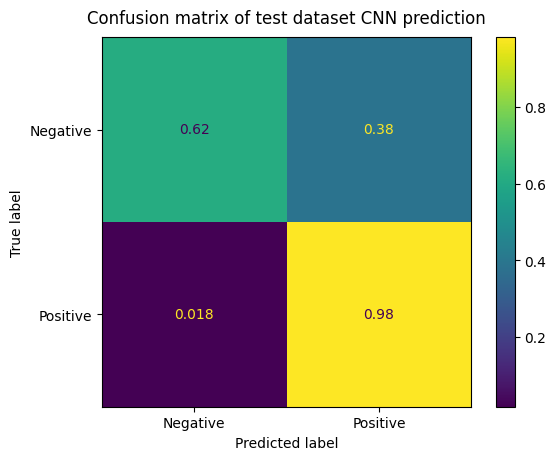

In [125]:
CNN_test_prediction = CNN_model.predict(test_images)

CNN_test_prediction = np.argmax(CNN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(CNN_test_prediction)):
  if CNN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, CNN_test_prediction , normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of test dataset CNN prediction", pad=10)
plt.show()

## 19. Save CNN model

In [126]:
#CNN_model.save("CNN_model")


## 20. Generate more images from dataset by applying a zoom filter 

Dimensions of new training image set (7136, 28, 28)
Dimensions of new training label set (7136, 1)
51.03699564933777
48.96300435066223


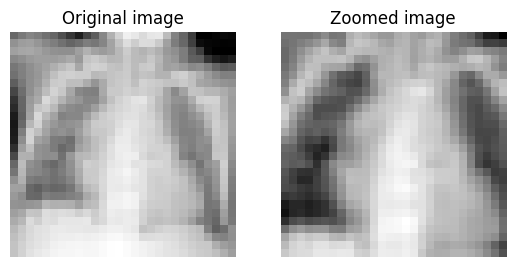

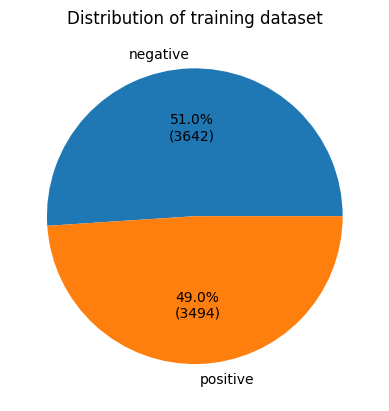

In [127]:
def zoomImageShow(image, zoom_level):
  height, width = np.shape(image)
  zoom_tuple = (zoom_level,) * 2 + (1,) * (image.ndim - 2)
  # Bounding box of the zoomed-in region within the input array
  zh = int(np.round(height / zoom_level))
  zw = int(np.round(width / zoom_level))
  top = (height - zh) // 2
  left = (width - zw) // 2

  out = zoom(image[top:top+zh, left:left+zw], zoom_tuple)

  # `out` might still be slightly larger than `img` due to rounding, so
  # trim off any extra pixels at the edges
  trim_top = ((out.shape[0] - height) // 2)
  trim_left = ((out.shape[1] - width) // 2)
  out = out[trim_top:trim_top+height, trim_left:trim_left+width]
  fig, (ax1, ax2) = plt.subplots(1, 2)
  ax1.imshow(image, cmap="gray")
  ax1.axis("off")
  ax1.set_title("Original image")
  ax2.imshow(out, cmap="gray")
  ax2.axis("off")
  ax2.set_title("Zoomed image")
  fig.subplots_adjust(top=1.4)

zoomImageShow(train_images[0],1.3)

def generateZoomImages(images_array, labels_array, zoom_levels):
  height, width = np.shape(images_array[0])
  new_images = images_array
  new_labels = labels_array
  for i in zoom_levels:
    zoom_tuple = (i,) * 2 + (1,) * (images_array[0].ndim - 2)
    for j in range(len(labels_array)):
        if labels_array[j][0] == 0:
          zh = int(np.round(height / i))
          zw = int(np.round(width / i))
          top = (height - zh) // 2
          left = (width - zw) // 2
          out = zoom(images_array[j][top:top+zh, left:left+zw], zoom_tuple)
          trim_top = ((out.shape[0] - height) // 2)
          trim_left = ((out.shape[1] - width) // 2)
          out = out[trim_top:trim_top+height, trim_left:trim_left+width]
          new_images = np.append(new_images, [out], axis=0)  
          new_labels = np.append(new_labels,[labels_array[j]], axis=0)
        
  return new_images, new_labels


new_train_images, new_train_labels = generateZoomImages(train_images, train_labels, [1.1, 1.2])
print("Dimensions of new training image set",np.shape(new_train_images))
print("Dimensions of new training label set",np.shape(new_train_labels))
getClassDistribution(new_train_labels, "Distribution of training dataset")

## 21. Train NN with new training dataset

In [128]:
NN_model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])

In [129]:
NN_optimizer = tf.keras.optimizers.Adam(learning_rate=0.0001)

NN_model.compile(optimizer=NN_optimizer,
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [130]:
history = NN_model.fit(new_train_images, new_train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=40)

Epoch 1/40
143/143 [==============================] - 1s 5ms/step - loss: 0.6464 - accuracy: 0.6306 - val_loss: 0.5021 - val_accuracy: 0.8588
Epoch 2/40
143/143 [==============================] - 1s 3ms/step - loss: 0.4850 - accuracy: 0.7916 - val_loss: 0.3623 - val_accuracy: 0.8492
Epoch 3/40
143/143 [==============================] - 1s 4ms/step - loss: 0.3983 - accuracy: 0.8346 - val_loss: 0.3155 - val_accuracy: 0.8664
Epoch 4/40
143/143 [==============================] - 1s 4ms/step - loss: 0.3695 - accuracy: 0.8416 - val_loss: 0.3721 - val_accuracy: 0.8282
Epoch 5/40
143/143 [==============================] - 1s 4ms/step - loss: 0.3508 - accuracy: 0.8530 - val_loss: 0.2775 - val_accuracy: 0.8817
Epoch 6/40
143/143 [==============================] - 1s 4ms/step - loss: 0.3392 - accuracy: 0.8613 - val_loss: 0.3281 - val_accuracy: 0.8492
Epoch 7/40
143/143 [==============================] - 1s 4ms/step - loss: 0.3312 - accuracy: 0.8632 - val_loss: 0.3262 - val_accuracy: 0.8588
Epoch 

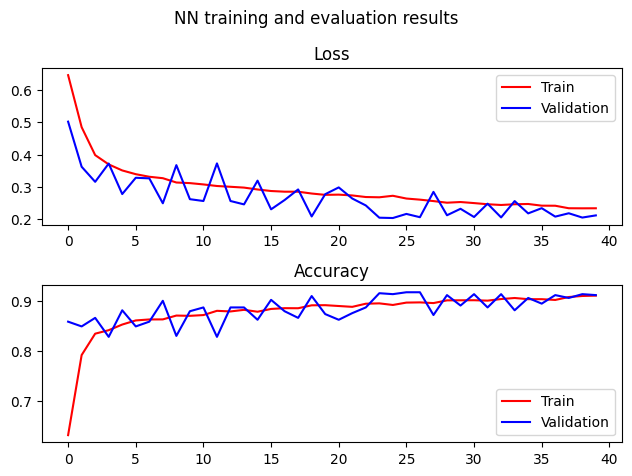

In [131]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(history.history['loss'], 'r')
line2, = axis[0].plot(history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(history.history['accuracy'], 'r')
line4, = axis[1].plot(history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("NN training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 22. Evaluate NN model with test dataset

20/20 [==============================] - 0s 2ms/step
Accuracy: 89.26282051282051


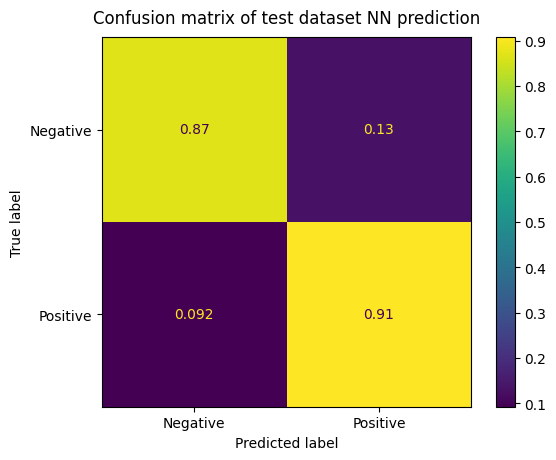

In [132]:
NN_test_prediction = NN_model.predict(test_images)

NN_test_prediction = np.argmax(NN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(NN_test_prediction)):
  if NN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, NN_test_prediction , normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of test dataset NN prediction", pad=10)
plt.show()

## 23. Save NN model

In [133]:
NN_model.save("NN_model")

INFO:tensorflow:Assets written to: NN_model\assets


INFO:tensorflow:Assets written to: NN_model\assets


## 24. Train CNN with the new training dataset

In [134]:
CNN_model = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(32, kernel_size =(5, 5), strides =1, activation ='relu', input_shape = (28,28,1)), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Conv2D(32, kernel_size =(5, 5), strides =1, activation ='relu'), 
  tf.keras.layers.MaxPooling2D(pool_size =(3, 3), strides =(1, 1)),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(32, activation='relu') ,
  tf.keras.layers.Dropout(0.3),
  tf.keras.layers.Dense(2 , activation ='softmax')
])

In [135]:
optimiser = tf.keras.optimizers.Adam(learning_rate=0.0001)
CNN_model.compile(optimizer=optimiser,
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])

In [136]:
CNN_history = CNN_model.fit(new_train_images, new_train_labels, validation_data=(val_images, val_labels), batch_size=50, epochs=25)

Epoch 1/25


143/143 [==============================] - 5s 26ms/step - loss: 0.5449 - accuracy: 0.7342 - val_loss: 0.3501 - val_accuracy: 0.8740
Epoch 2/25
143/143 [==============================] - 4s 26ms/step - loss: 0.4048 - accuracy: 0.8323 - val_loss: 0.4028 - val_accuracy: 0.8149
Epoch 3/25
143/143 [==============================] - 4s 26ms/step - loss: 0.3660 - accuracy: 0.8536 - val_loss: 0.2839 - val_accuracy: 0.8893
Epoch 4/25
143/143 [==============================] - 4s 26ms/step - loss: 0.3334 - accuracy: 0.8659 - val_loss: 0.3126 - val_accuracy: 0.8683
Epoch 5/25
143/143 [==============================] - 4s 26ms/step - loss: 0.3120 - accuracy: 0.8788 - val_loss: 0.2340 - val_accuracy: 0.9198
Epoch 6/25
143/143 [==============================] - 4s 26ms/step - loss: 0.2950 - accuracy: 0.8887 - val_loss: 0.2743 - val_accuracy: 0.8931
Epoch 7/25
143/143 [==============================] - 4s 27ms/step - loss: 0.2834 - accuracy: 0.8920 - val_loss: 0.2201 - val_accuracy: 0.9141
Epoch 8/25

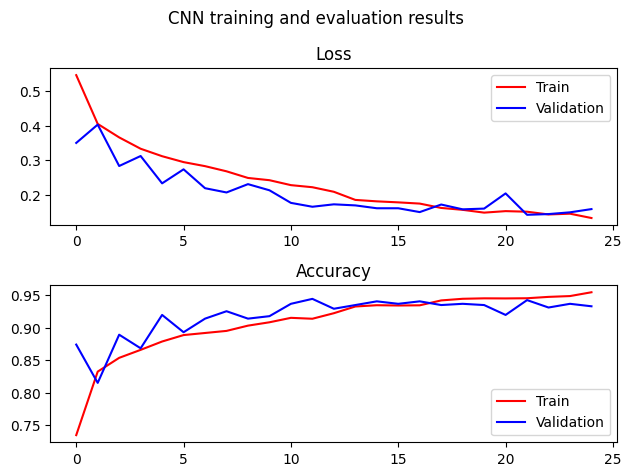

In [137]:
# Loss plot
figure, axis = plt.subplots(2)
line1, = axis[0].plot(CNN_history.history['loss'], 'r')
line2, = axis[0].plot(CNN_history.history['val_loss'], 'b')
axis[0].legend(['Train','Validation'])
axis[0].set_title("Loss")

# Accuracy plot
line3, = axis[1].plot(CNN_history.history['accuracy'], 'r')
line4, = axis[1].plot(CNN_history.history['val_accuracy'], 'b')
axis[1].legend(['Train','Validation'])
axis[1].set_title("Accuracy")
figure.suptitle("CNN training and evaluation results")
figure.tight_layout(pad=1)

plt.show()

## 25. Evaluate CNN model with test dataset

20/20 [==============================] - 0s 5ms/step
Accuracy: 92.3076923076923


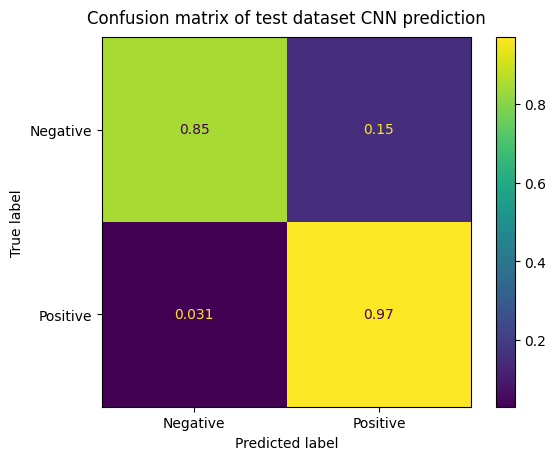

In [138]:
CNN_test_prediction = CNN_model.predict(test_images)

CNN_test_prediction = np.argmax(CNN_test_prediction, axis=1)

total = 0
correct = 0
for i in range(len(CNN_test_prediction)):
  if CNN_test_prediction[i] == test_labels[i][0]:
    correct += 1
  total += 1

print("Accuracy:", correct * 100 / total)

result = confusion_matrix(test_labels, CNN_test_prediction , normalize='true')

cm_display = ConfusionMatrixDisplay(confusion_matrix = result, display_labels = ['Negative','Positive'])

cm_display.plot()
plt.title("Confusion matrix of test dataset CNN prediction", pad=10)
plt.show()

## 26. Save CNN model

In [139]:
CNN_model.save("CNN_model")

INFO:tensorflow:Assets written to: CNN_model\assets


INFO:tensorflow:Assets written to: CNN_model\assets
